<a href="https://colab.research.google.com/github/AlwaysEden/Machine-Learning-HW/blob/main/HW10_RBFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Code
 Implement RBF networks from scratch (no specialized library like sklearn) using the help of ChatGPT. We will not provide the prompts for you this time.

 You are given two datasets:

 *    **'circle in the square'**
 contains two training data sets: *cis_train1.txt* and *cis_train2.txt* (they have different number of samples.) We provide you with one test set: *cis_test.txt*. Apply the RBF network with different parameters (at least three different number of basis functions, and different means and variances) and report the accuracy. Plot the original dataset and the predictions.

 *   **'function approximation'**
 contains two training data sets: *fa_train1.txt* and *fa_train2.txt* (they have different number of samples.) We provided one test set: 'fa_test.txt'. Apply the RBF network with different parameters (at least three different number of basis functions, and different means and variances) and report the MSE. Plot the original dataset and the predictions.

---

**Show all your code below.**

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [5]:
def loaddata(filepath):
  data = np.loadtxt(filepath)
  X = data[:, :2]
  Y = data[:, 2]
  return X, Y

def accuracy(y_true, y_pred):
  correct = np.sum(y_true == y_pred)
  return correct / len(y_true)

class RBFNetwork:
    def __init__(self, num_basis, method='kmeans', basis_func='Gaussian'):
        self.num_basis = num_basis
        self.method = method
        self.basis_func = basis_func
        self.centers = None
        self.variances = None
        self.weights = None
        self.beta = 1.0

    def _euclidean_distance(self, x, center):
        return np.sqrt(np.sum((x - center) ** 2, axis=1))

    def _rbf(self, x, center, variance):
        if self.basis_func == 'Gaussian':
            distances = self._euclidean_distance(x, center)
            return np.exp(-(distances ** 2) / (2 * variance))
        elif self.basis_func == 'Multiquadric':
          distances = self._euclidean_distance(x, center)
          return np.sqrt(distances ** 2 + self.beta ** 2)
        elif self.basis_func == 'ThinPlateSpline':
          distances = self._euclidean_distance(x, center)
          return (distances ** 2) * np.log(distances + 1e-6)

    def fit(self, X, y, lattice_range=None, prior_variance=None):
        if self.method == 'kmeans':
            # Center Setting with kMeans
            kmeans = KMeans(n_clusters=self.num_basis)
            kmeans.fit(X)
            self.centers = kmeans.cluster_centers_
            self.variances = np.array([np.mean(self._euclidean_distance(X, center)) ** 2 for center in self.centers])

        elif self.method == 'manual' and lattice_range and prior_variance:
            # Center Setting with lattice
            x_min, x_max = lattice_range[0]
            y_min, y_max = lattice_range[1]
            x_centers = np.linspace(x_min, x_max, int(np.sqrt(self.num_basis)))
            y_centers = np.linspace(y_min, y_max, int(np.sqrt(self.num_basis)))
            self.centers = np.array([(x, y) for x in x_centers for y in y_centers])

            self.variances = np.full(self.num_basis, prior_variance)

        # basis function
        G = np.hstack([self._rbf(X, c, v)[:, np.newaxis] for c, v in zip(self.centers, self.variances)])

        # Weight Calculation
        self.weights = np.linalg.pinv(G.T @ G) @ G.T @ y

    def predict(self, X):
        G = np.hstack([self._rbf(X, c, v)[:, np.newaxis] for c, v in zip(self.centers, self.variances)])
        return G @ self.weights

START: Circle in the square

In [6]:
#circle in the square
X_train, y_train = loaddata('/content/drive/MyDrive/RBFN_dataset/cis_train1.txt')
#X_train, y_train = loaddata('/content/drive/MyDrive/RBFN_dataset/cis_train2.txt')
X_test, y_test = loaddata('/content/drive/MyDrive/RBFN_dataset/cis_test.txt')

In [21]:
#Mean&Variance: kMeans, On manual
#Basis Function: Gaussian, Multiquadric, ThinPlateSpline

# 1. Using kMeans and Gaussian
rbf_kmeans_gaussian = RBFNetwork(num_basis=10, method='kmeans', basis_func='Gaussian')
rbf_kmeans_gaussian.fit(X_train, y_train)
pred_kmeans_gaussian = rbf_kmeans_gaussian.predict(X_test)

# 2. Using kMeans and Multiquadric
rbf_kmeans_multiquadric = RBFNetwork(num_basis=6, method='kmeans', basis_func='Multiquadric')
rbf_kmeans_multiquadric.fit(X_train, y_train)
pred_kmeans_multiquadric = rbf_kmeans_multiquadric.predict(X_test)

# 3. Using kMeans and ThinPlateSpline
rbf_kmeans_thinplatespline = RBFNetwork(num_basis=10, method='kmeans', basis_func='ThinPlateSpline')
rbf_kmeans_thinplatespline.fit(X_train, y_train)
pred_kmeans_thinplatespline = rbf_kmeans_thinplatespline.predict(X_test)

lattice_range = [(0, 1), (0, 1)] # Range of X and Y

# 4. Using manual method and Gaussian
prior_variance_4 = 0.65
rbf_manual_gaussian = RBFNetwork(num_basis=10, method='manual', basis_func = 'Gaussian')
rbf_manual_gaussian.fit(X_train, y_train, lattice_range=lattice_range, prior_variance=prior_variance_4)
pred_manual_gaussian = rbf_manual_gaussian.predict(X_test)

# 5. Using manual method and Multiquadric
prior_variance_5 = 0.6
rbf_manual_multiquadric = RBFNetwork(num_basis=10, method='manual', basis_func = 'Multiquadric')
rbf_manual_multiquadric.fit(X_train, y_train, lattice_range=lattice_range, prior_variance=prior_variance_5)
pred_manual_multiquadric = rbf_manual_multiquadric.predict(X_test)

# 6. Using manual method and ThinPlateSpline
prior_variance_6 = 0.55
rbf_manual_thinplatespline = RBFNetwork(num_basis=10, method='manual', basis_func = 'ThinPlateSpline')
rbf_manual_thinplatespline.fit(X_train, y_train, lattice_range=lattice_range, prior_variance=prior_variance_6)
pred_manual_thinplatespline = rbf_manual_thinplatespline.predict(X_test)

pred_kmeans_gaussian_fixed = np.where(pred_kmeans_gaussian >= 0.5, 1, 0)
pred_kmeans_multiquadric_fixed = np.where(pred_kmeans_multiquadric >= 0.5, 1, 0)
pred_kmeans_thinplatespline_fixed = np.where(pred_kmeans_thinplatespline >= 0.5, 1, 0)
pred_manual_gaussian_fixed = np.where(pred_manual_gaussian >= 0.5, 1, 0)
pred_manual_multiquadric_fixed = np.where(pred_manual_multiquadric >= 0.5, 1, 0)
pred_manual_thinplatespline_fixed = np.where(pred_manual_thinplatespline >= 0.5, 1, 0)


In [22]:
acc_kmeans_gauusian = accuracy(pred_kmeans_gaussian_fixed, y_test)
acc_kmeans_multiquadric = accuracy(pred_kmeans_multiquadric_fixed, y_test)
acc_kmeans_thinplatespline = accuracy(pred_kmeans_thinplatespline_fixed, y_test)
acc_manual_gaussian = accuracy(pred_manual_gaussian_fixed, y_test)
acc_manual_multiquadric = accuracy(pred_manual_multiquadric_fixed, y_test)
acc_manual_thinplatespline = accuracy(pred_manual_thinplatespline_fixed, y_test)

print(f"Accuracy of kMeans and Gaussian: {acc_kmeans_gauusian}")
print(f"Accuracy of kMeans and Multiquadric: {acc_kmeans_multiquadric}")
print(f"Accuracy of kMeans and ThinPlateSpline: {acc_kmeans_thinplatespline}")
print(f"Accuracy of manual and Gaussian: {acc_manual_gaussian}")
print(f"Accuracy of manual and Multiquadric: {acc_manual_multiquadric}")
print(f"Accuracy of manual and ThinPlateSpline: {acc_manual_thinplatespline}")

Accuracy of kMeans and Gaussian: 0.9395
Accuracy of kMeans and Multiquadric: 0.9604
Accuracy of kMeans and ThinPlateSpline: 0.9257
Accuracy of manual and Gaussian: 0.9438
Accuracy of manual and Multiquadric: 0.9479
Accuracy of manual and ThinPlateSpline: 0.9596


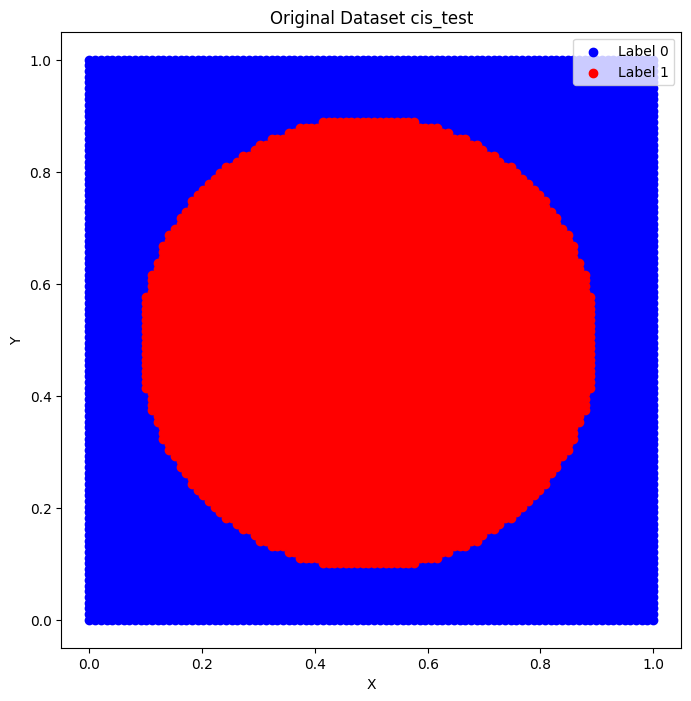

In [23]:
#Plot Original Dataset cis_test
X = X_test[:, 0]
Y = X_test[:, 1]
labels = y_test

X_label0 = X[labels == 0]
Y_label0 = Y[labels == 0]
X_label1 = X[labels == 1]
Y_label1 = Y[labels == 1]

plt.figure(figsize=(8, 8))
plt.scatter(X_label0, Y_label0, color='blue', label='Label 0')
plt.scatter(X_label1, Y_label1, color='red', label='Label 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("Original Dataset cis_test")
plt.show()

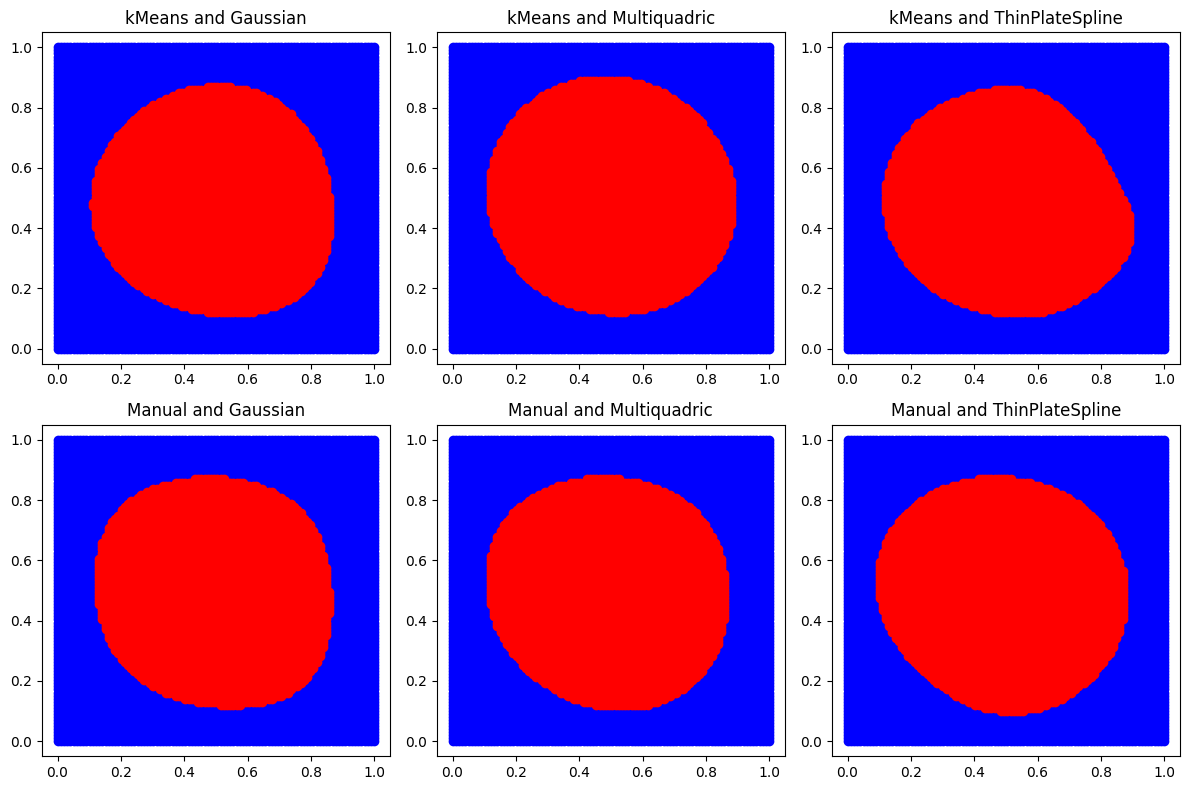

In [24]:
X = X_test[:, 0]
Y = X_test[:, 1]
label_1 = pred_kmeans_gaussian_fixed.copy()
label_2 = pred_kmeans_multiquadric_fixed.copy()
label_3 = pred_kmeans_thinplatespline_fixed.copy()
label_4 = pred_manual_gaussian_fixed.copy()
label_5 = pred_manual_multiquadric_fixed.copy()
label_6 = pred_manual_thinplatespline_fixed.copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
X_label0 = X[label_1 == 0]
Y_label0 = Y[label_1 == 0]
X_label1 = X[label_1 == 1]
Y_label1 = Y[label_1 == 1]
axs[0, 0].scatter(X_label0, Y_label0, color='blue', label='Label 0')
axs[0, 0].scatter(X_label1, Y_label1, color='red', label='Label 1')
axs[0, 0].set_title('kMeans and Gaussian')

X_label0 = X[label_2 == 0]
Y_label0 = Y[label_2 == 0]
X_label1 = X[label_2 == 1]
Y_label1 = Y[label_2 == 1]
axs[0, 1].scatter(X_label0, Y_label0, color='blue', label='Label 0')
axs[0, 1].scatter(X_label1, Y_label1, color='red', label='Label 1')
axs[0, 1].set_title('kMeans and Multiquadric')

X_label0 = X[label_3 == 0]
Y_label0 = Y[label_3 == 0]
X_label1 = X[label_3 == 1]
Y_label1 = Y[label_3 == 1]
axs[0, 2].scatter(X_label0, Y_label0, color='blue', label='Label 0')
axs[0, 2].scatter(X_label1, Y_label1, color='red', label='Label 1')
axs[0, 2].set_title('kMeans and ThinPlateSpline')

X_label0 = X[label_4 == 0]
Y_label0 = Y[label_4 == 0]
X_label1 = X[label_4 == 1]
Y_label1 = Y[label_4 == 1]
axs[1, 0].scatter(X_label0, Y_label0, color='blue', label='Label 0')
axs[1, 0].scatter(X_label1, Y_label1, color='red', label='Label 1')
axs[1, 0].set_title('Manual and Gaussian')

X_label0 = X[label_5 == 0]
Y_label0 = Y[label_5 == 0]
X_label1 = X[label_5 == 1]
Y_label1 = Y[label_5 == 1]
axs[1, 1].scatter(X_label0, Y_label0, color='blue', label='Label 0')
axs[1, 1].scatter(X_label1, Y_label1, color='red', label='Label 1')
axs[1, 1].set_title('Manual and Multiquadric')

X_label0 = X[label_6 == 0]
Y_label0 = Y[label_6 == 0]
X_label1 = X[label_6 == 1]
Y_label1 = Y[label_6 == 1]
axs[1, 2].scatter(X_label0, Y_label0, color='blue', label='Label 0')
axs[1, 2].scatter(X_label1, Y_label1, color='red', label='Label 1')
axs[1, 2].set_title('Manual and ThinPlateSpline')

plt.tight_layout()
plt.show()


END: circle in the square

START: Function approximation

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def loaddata(filepath):
    data = np.loadtxt(filepath)
    X = data[:, 0]
    Y = data[:, 1]
    return X, Y

def calculate_mse(y_true, y_pred):
    error = y_true - y_pred
    mse = np.mean(error ** 2)
    return mse

class RBFNetwork:
    def __init__(self, num_basis, method='kmeans', basis_func='Gaussian'):
        self.num_basis = num_basis
        self.method = method
        self.basis_func = basis_func
        self.centers = None
        self.variances = None
        self.weights = None
        self.beta = 1.0

    def _euclidean_distance(self, x, center):
        return np.abs(X - center)

    def _rbf(self, x, center, variance):
        if self.basis_func == 'Gaussian':
            distances = self._euclidean_distance(x, center)
            return np.exp(-(distances ** 2) / (2 * variance))
        elif self.basis_func == 'Multiquadric':
          distances = self._euclidean_distance(x, center)
          return np.sqrt(distances ** 2 + self.beta ** 2)
        elif self.basis_func == 'ThinPlateSpline':
          distances = self._euclidean_distance(x, center)
          return (distances ** 2) * np.log(distances + 1e-6)


    def _compute_basis_matrix(self, X):
        # 가우시안 기저 함수 계산
        G = np.exp(-((X[:, np.newaxis] - self.centers) ** 2) / (2 * self.variances ** 2))
        return G

    def fit(self, X, y, prior_variance=None):
        if self.method == 'manual':
            x_min, x_max = np.min(X), np.max(X)
            self.centers = np.linspace(x_min, x_max, self.num_basis)
            self.variances = prior_variance
        elif self.method == 'kmeans':
            kmeans = KMeans(n_clusters=self.num_basis).fit(X.reshape(-1, 1))
            self.centers = kmeans.cluster_centers_.flatten()
            distances = np.array([self._euclidean_distance(X, c) for c in self.centers])
            self.variances = np.var(distances, axis=None)  # 각 군집에 대한 분산 설정

        G = self._compute_basis_matrix(X)
        self.weights = np.linalg.pinv(G) @ y  # RBF 네트워크 가중치 계산

    def predict(self, X):
        G = self._compute_basis_matrix(X)
        return G @ self.weights

In [26]:
X_train, y_train = loaddata('/content/drive/MyDrive/RBFN_dataset/fa_train1.txt')
X_test, y_test = loaddata('/content/drive/MyDrive/RBFN_dataset/fa_test.txt')

In [27]:
#Mean&Variance: kMeans, On manual
#Basis Function: Gaussian, Multiquadric, ThinPlateSpline

# 1. Using kMeans and Gaussian
rbf_kmeans_gaussian = RBFNetwork(num_basis=9, method='kmeans', basis_func='Gaussian')
rbf_kmeans_gaussian.fit(X_train, y_train)
pred_kmeans_gaussian = rbf_kmeans_gaussian.predict(X_test)

# 2. Using kMeans and Multiquadric
rbf_kmeans_multiquadric = RBFNetwork(num_basis=10, method='kmeans', basis_func='Multiquadric')
rbf_kmeans_multiquadric.fit(X_train, y_train)
pred_kmeans_multiquadric = rbf_kmeans_multiquadric.predict(X_test)

# 3. Using kMeans and ThinPlateSpline
rbf_kmeans_thinplatespline = RBFNetwork(num_basis=10, method='kmeans', basis_func='ThinPlateSpline')
rbf_kmeans_thinplatespline.fit(X_train, y_train)
pred_kmeans_thinplatespline = rbf_kmeans_thinplatespline.predict(X_test)

# 4. Using manual method and Gaussian
prior_variance_4 = 0.65 # using Experimental method, the best accuracy is from 0.65 variance.
rbf_manual_gaussian = RBFNetwork(num_basis=10, method='manual', basis_func = 'Gaussian')
rbf_manual_gaussian.fit(X_train, y_train, prior_variance=prior_variance_4)
pred_manual_gaussian = rbf_manual_gaussian.predict(X_test)

# 5. Using manual method and Multiquadric
prior_variance_5 = 0.55 # using Experimental method, the best accuracy is from 0.65 variance.
rbf_manual_multiquadric = RBFNetwork(num_basis=10, method='manual', basis_func = 'Multiquadric')
rbf_manual_multiquadric.fit(X_train, y_train, prior_variance=prior_variance_5)
pred_manual_multiquadric = rbf_manual_multiquadric.predict(X_test)

# 6. Using manual method and ThinPlateSpline
prior_variance_6 = 0.45 # using Experimental method, the best accuracy is from 0.65 variance.
rbf_manual_thinplatespline = RBFNetwork(num_basis=10, method='manual', basis_func = 'ThinPlateSpline')
rbf_manual_thinplatespline.fit(X_train, y_train, prior_variance=prior_variance_6)
pred_manual_thinplatespline = rbf_manual_thinplatespline.predict(X_test)

In [28]:
mse_kmeans_gaussian = calculate_mse(y_test, pred_kmeans_gaussian)
mse_kmeans_multiquadric = calculate_mse(y_test, pred_kmeans_multiquadric)
mse_kmeans_thinplatespline = calculate_mse(y_test, pred_kmeans_thinplatespline)
mse_manual_gaussian = calculate_mse(y_test, pred_manual_gaussian)
mse_manual_multiquadric = calculate_mse(y_test, pred_manual_multiquadric)
mse_manual_thinplatespline = calculate_mse(y_test, pred_manual_thinplatespline)

print(f"MSE of kMeans and Gaussian: {mse_kmeans_gaussian}")
print(f"MSE of kMeans and Multiquadric: {mse_kmeans_multiquadric}")
print(f"MSE of kMeans and ThinPlateSpline: {mse_kmeans_thinplatespline}")
print(f"MSE of manual and Gaussian: {mse_manual_gaussian}")
print(f"MSE of manual and Multiquadric: {mse_manual_multiquadric}")
print(f"MSE of manual and ThinPlateSpline: {mse_manual_thinplatespline}")

MSE of kMeans and Gaussian: 0.010037998147648696
MSE of kMeans and Multiquadric: 0.003231898229290306
MSE of kMeans and ThinPlateSpline: 0.005222906959385247
MSE of manual and Gaussian: 0.004825612493978148
MSE of manual and Multiquadric: 0.0042986525628972245
MSE of manual and ThinPlateSpline: 0.0034921596001233875


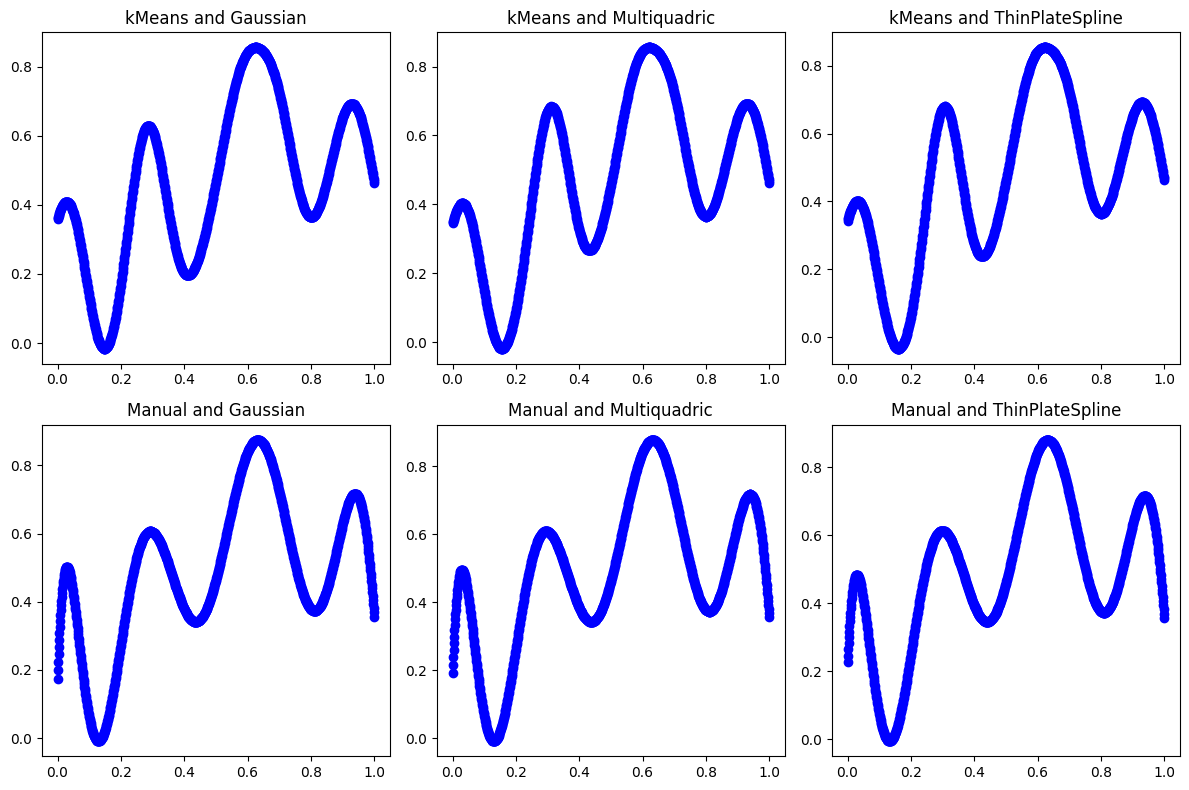

In [29]:
# 배열을 X, Y 좌표와 label로 분리
X = X_test.copy()   # 첫 번째 열이 X 좌표
Y_1 = pred_kmeans_gaussian.copy()
Y_2 = pred_kmeans_multiquadric.copy()
Y_3 = pred_kmeans_thinplatespline.copy()
Y_4 = pred_manual_gaussian.copy()
Y_5 = pred_manual_multiquadric.copy()
Y_6 = pred_manual_thinplatespline.copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].scatter(X, Y_1, color='blue')
axs[0, 0].set_title('kMeans and Gaussian')

axs[0, 1].scatter(X, Y_2, color='blue')
axs[0, 1].set_title('kMeans and Multiquadric')

axs[0, 2].scatter(X, Y_3, color='blue')
axs[0, 2].set_title('kMeans and ThinPlateSpline')

axs[1, 0].scatter(X, Y_4, color='blue')
axs[1, 0].set_title('Manual and Gaussian')

axs[1, 1].scatter(X, Y_5, color='blue')
axs[1, 1].set_title('Manual and Multiquadric')

axs[1, 2].scatter(X, Y_6, color='blue')
axs[1, 2].set_title('Manual and ThinPlateSpline')

plt.tight_layout()
plt.show()


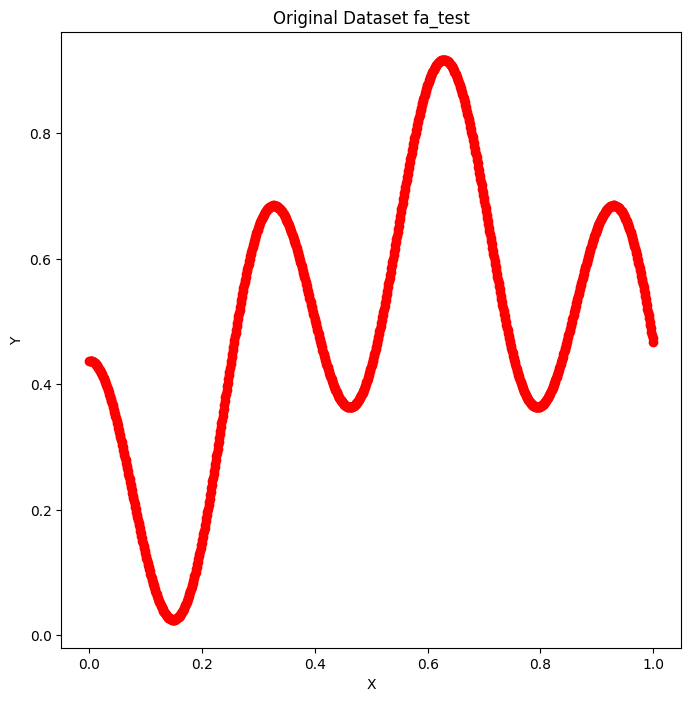

In [32]:
#fa_test plot
plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Original Dataset fa_test")
plt.show()

# Report


1.   What were some challenges that you encountered while using ChatGPT to assist you in this task? (Name at least 2)
2.   Ask ChatGPT to analyse the advantages of using a larger dataset for the RBFN. Do you agree with ChatGPT's statement? Why yes or why not?
3.   Compare the results when you varied the parameters. Which configuration yield the best results for each task?
4.   Conclude with some thoughts and things you learned from this homework.

# Answer
1.
- Implementing RBF by taking data dimensions into account.
- Passively giving variance and mean.
2. I agreed with GPT's idea. I think it's great because the more data you have, the less bias you have, the better performance you get, and the less computation time you have.
3. For both datasets, kMeans and Multiquadric performed the best. We tuned all the models, but the best performance was achieved with 6 clusters in 'circle in the square' and 10 clusters in 'function approximation'.
4. I learned about different types of basis functions, especially the laboriousness of hyper-parameter tuning by manually finding the centroid. I also got my first experience with neural networks by multiplying weights.

# ChatGPT's Answer about Q2
Using a larger dataset for the Radial Basis Function Network (RBFN) offers several advantages, both in terms of model performance and generalization. Here are some key benefits:

### 1. **Improved Generalization**
   - **Better Representation of the Data Distribution**: A larger dataset typically captures more variations in the underlying data distribution, which allows the RBFN to learn more representative patterns. This reduces the likelihood of overfitting and helps the model generalize better to unseen data.
   - **Reduction of Bias**: With more data, the model is less likely to learn biased or incomplete representations, improving its robustness in making predictions across diverse scenarios.

### 2. **Better Estimation of Centers and Variances**
   - **Accurate Cluster Centers**: In RBFN, the centers (typically chosen using clustering methods like k-means) are crucial for defining the function approximations. A larger dataset provides more data points, improving the accuracy of these centers. This makes the network better at capturing the nuances of the function it is approximating.
   - **Stable Variances**: The calculation of variances (often related to the spread of the data points in a cluster) becomes more stable with more data. With a small dataset, variance estimates might be highly sensitive to a few outliers or less representative points, while larger datasets provide a more reliable estimate of variability.

### 3. **Reduced Impact of Noise**
   - **Outliers and Noise Filtering**: With more data points, the model becomes less sensitive to noise and outliers. As the dataset increases in size, the impact of any individual noisy data point becomes less significant. The network can more effectively focus on the underlying signal, leading to a more accurate function approximation.
   - **Smoothing of Function Approximation**: In function approximation tasks, noise can cause a model to overfit to specific data points. A larger dataset allows the RBFN to average out this noise, producing smoother and more stable approximations.

### 4. **Increased Model Capacity**
   - **Handling Complex Data**: A larger dataset allows the RBFN to better capture complex relationships in the data. More data points provide the model with more examples of different parts of the input space, which helps it approximate more intricate functions.
   - **More Basis Functions (RBFs)**: In RBFN, the number of centers (basis functions) determines the flexibility of the model. With more data, you can use a larger number of basis functions, enabling the model to capture more detailed nuances of the target function. This is particularly important for high-dimensional or non-linear functions.

### 5. **Improved Weight Calculation**
   - **Stable Weight Estimation**: The weights in the RBFN are typically calculated using the pseudo-inverse of the matrix formed by the basis functions. With a larger dataset, the matrix becomes more stable, reducing the risk of numerical instability. This leads to more reliable weight calculations, which in turn improve the model’s predictions.
   - **Better Fit to Data**: As the dataset grows, the RBFN can better align its predictions with the true underlying data, resulting in lower error rates (e.g., lower Mean Squared Error).

### 6. **Enhanced Training Process**
   - **More Data Points for Training**: Larger datasets allow the model to learn more from each training example. This is particularly useful in cases where the function being approximated has a large number of fluctuations or is highly non-linear.
   - **Better Regularization**: With more data, the risk of overfitting to training data decreases. Regularization methods, such as using more data points, can help prevent overfitting by ensuring that the model focuses on general patterns rather than noise.

### 7. **Increased Robustness**
   - **Handling Edge Cases**: A larger dataset is more likely to include edge cases or rare events, helping the RBFN learn how to handle these instances. This is especially important in real-world applications where data might include unusual but important patterns.
   - **Reduces the Risk of Underfitting**: Small datasets can lead to underfitting, where the model is too simple to capture the underlying data structure. A larger dataset allows the RBFN to train on more data points, enabling it to fit the true distribution better.

### 8. **Enhanced Flexibility in Model Configuration**
   - **More Freedom for Hyperparameter Tuning**: A larger dataset provides the flexibility to experiment with more complex configurations of the RBFN, such as using more centers, choosing different kernels, or adjusting variances. This flexibility improves the overall performance of the model.

### Conclusion
In summary, using a larger dataset for RBFN improves the model's ability to generalize, better estimate cluster centers and variances, reduce noise, and handle more complex relationships within the data. With more data, the RBFN is better equipped to learn accurate representations, resulting in better approximations and more reliable predictions.